In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import cv2


from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.layers as tfl


In [3]:
pathToAugDatasets = r'E:\AlzheimerMRIScanDataset\AugmentedAlzheimerDataset'

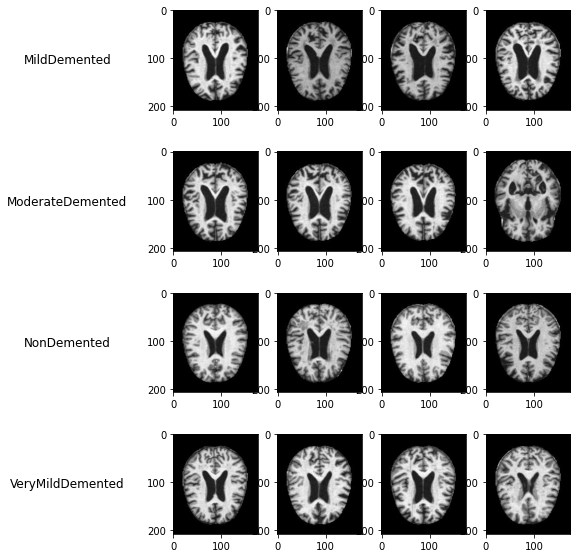

In [32]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

row_labels = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

images = [Image.open(i) for i in glob.glob(os.path.join(pathToDatasets,'MildDemented\*.jpg'))[:16:4]]
images.extend([Image.open(i) for i in glob.glob(os.path.join(pathToDatasets,'ModerateDemented\*.jpg'))[:16:4]])
images.extend([Image.open(i) for i in glob.glob(os.path.join(pathToDatasets,'NonDemented\*.jpg'))[:16:4]])
images.extend([Image.open(i) for i in glob.glob(os.path.join(pathToDatasets,'VeryMildDemented\*.jpg'))[:16:4]])

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap='gray')
    #ax.axis('off')
    
    if i % 4 == 0:
        row = i // 4
        ax.set_ylabel(row_labels[row], rotation=0, labelpad=80, fontsize=12, va='center')
        #ax.axis('off')
plt.tight_layout()
plt.show()

## Augmented Data Training

In [13]:

data = []

pbar = tqdm(enumerate(os.listdir(pathToAugDatasets)))
for i,class_ in pbar:
    ohe = [0,0,0,0]
    ohe[i] += 1
    
    dir_ = os.path.join(pathToAugDatasets,class_)
    
    pbar2 = tqdm(glob.glob(os.path.join(dir_,'*.jpg')))
    for img in pbar2:
        row = []
        
        image = Image.open(img)
        img_array = np.array(image.convert('L'))
        
        img_array = cv2.resize(img_array,(200,200))
        row.append(img_array)
        
        row.extend(ohe)
        
        data.append(row)


        


X = [dat[0] for dat in data]
Y = [dat[1::] for dat in data]  
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

0it [00:00, ?it/s]
 37%|████████████████████████████▋                                                 | 3297/8960 [00:08<01:14, 75.76it/s]


 42%|████████████████████████████████▉                                             | 3786/8960 [00:16<01:08, 76.03it/s]


 48%|█████████████████████████████████████▎                                        | 4282/8960 [00:23<01:28, 52.74it/s]


 53%|█████████████████████████████████████████▌                                    | 4778/8960 [00:31<01:13, 56.87it/s]


 59%|██████████████████████████████████████████████▏                               | 5303/8960 [00:38<00:49, 74.38it/s]


 65%|██████████████████████████████████████████████████▋                           | 5825/8960 [00:46<00:41, 75.79it/s]


 71%|███████████████████████████████████████████████████████▎                      | 6360/8960 [00:53<00:35, 73.60it/s]


 78%|████████████████████████████████████████████████████████████▍                 | 6944/8960 [01:01<00:25, 79.13it/s]


 84%|█████████████████████████████████████████████████████████████████▎            | 7502/8960 [01:08<00:19, 74.31it/s]


 90%|█████████████████████████████████████████████████████████████████████▉        | 8032/8960 [01:15<00:13, 67.97it/s]


 95%|██████████████████████████████████████████████████████████████████████████    | 8501/8960 [01:23<00:07, 60.48it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 8960/8960 [01:30<00:00, 98.68it/s]
1it [01:30, 90.88s/it]
  0%|                                                                                         | 0/6464 [00:00<?, ?it/s]


  8%|██████▎                                                                        | 521/6464 [00:07<01:20, 74.07it/s]


 17%|█████████████                                                                 | 1087/6464 [00:14<01:06, 80.39it/s]


 26%|████████████████████▏                                                         | 1678/6464 [00:21<01:00, 79.33it/s]


 35%|███████████████████████████▎                                                  | 2260/6464 [00:29<00:52, 79.90it/s]


 44%|██████████████████████████████████▎                                           | 2843/6464 [00:36<00:43, 82.97it/s]


 53%|█████████████████████████████████████████▍                                    | 3434/6464 [00:43<00:37, 79.85it/s]


 62%|████████████████████████████████████████████████▎                             | 4000/6464 [00:51<00:38, 63.63it/s]


 71%|███████████████████████████████████████████████████████▏                      | 4572/6464 [00:58<00:29, 63.94it/s]


 80%|██████████████████████████████████████████████████████████████▏               | 5151/6464 [01:05<00:16, 80.70it/s]


 89%|█████████████████████████████████████████████████████████████████████         | 5721/6464 [01:13<00:10, 71.59it/s]


 98%|████████████████████████████████████████████████████████████████████████████  | 6305/6464 [01:20<00:01, 79.84it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 6464/6464 [01:22<00:00, 78.15it/s]
2it [02:53, 88.47s/it]
  4%|██▉                                                                            | 353/9600 [00:05<02:18, 66.78it/s]


  9%|███████▏                                                                       | 880/9600 [00:12<02:20, 61.98it/s]


 15%|███████████▊                                                                  | 1458/9600 [00:20<01:42, 79.80it/s]


 21%|████████████████▌                                                             | 2034/9600 [00:27<01:34, 80.25it/s]


 27%|█████████████████████▏                                                        | 2607/9600 [00:34<01:31, 76.43it/s]


 33%|█████████████████████████▊                                                    | 3177/9600 [00:41<01:22, 77.55it/s]


 39%|██████████████████████████████▍                                               | 3747/9600 [00:49<01:13, 79.23it/s]


 45%|███████████████████████████████████                                           | 4312/9600 [00:56<01:13, 72.43it/s]


 51%|███████████████████████████████████████▌                                      | 4874/9600 [01:03<01:02, 75.99it/s]


 57%|████████████████████████████████████████████▏                                 | 5436/9600 [01:11<01:16, 54.73it/s]


 62%|████████████████████████████████████████████████▎                             | 5940/9600 [01:18<00:46, 79.43it/s]


 67%|████████████████████████████████████████████████████▎                         | 6444/9600 [01:25<00:47, 66.95it/s]


 72%|████████████████████████████████████████████████████████▌                     | 6954/9600 [01:33<00:36, 73.12it/s]


 78%|████████████████████████████████████████████████████████████▋                 | 7468/9600 [01:40<00:26, 79.70it/s]


 84%|█████████████████████████████████████████████████████████████████▍            | 8054/9600 [01:47<00:19, 81.05it/s]


 90%|██████████████████████████████████████████████████████████████████████▏       | 8640/9600 [01:55<00:12, 79.03it/s]


 96%|██████████████████████████████████████████████████████████████████████████▉   | 9227/9600 [02:02<00:05, 68.64it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 9600/9600 [02:07<00:00, 75.43it/s]
3it [05:01, 100.18s/it]
  2%|█▊                                                                             | 205/8960 [00:02<01:50, 79.23it/s]


  9%|██████▉                                                                        | 786/8960 [00:09<01:44, 78.54it/s]


 15%|███████████▊                                                                  | 1360/8960 [00:17<01:37, 78.03it/s]


 21%|████████████████▍                                                             | 1882/8960 [00:24<02:24, 48.92it/s]


 26%|████████████████████▍                                                         | 2351/8960 [00:32<01:34, 69.77it/s]


 32%|████████████████████████▊                                                     | 2855/8960 [00:39<01:35, 64.20it/s]


 38%|█████████████████████████████▌                                                | 3394/8960 [00:47<01:09, 79.65it/s]


 43%|█████████████████████████████████▊                                            | 3884/8960 [00:54<01:14, 68.56it/s]


 49%|█████████████████████████████████████▉                                        | 4356/8960 [01:02<00:59, 77.94it/s]


 54%|██████████████████████████████████████████                                    | 4828/8960 [01:09<01:17, 53.44it/s]


 60%|██████████████████████████████████████████████▋                               | 5366/8960 [01:17<00:47, 74.97it/s]


 66%|███████████████████████████████████████████████████▋                          | 5940/8960 [01:24<00:39, 76.10it/s]


 72%|████████████████████████████████████████████████████████▍                     | 6482/8960 [01:31<00:34, 72.08it/s]


 77%|████████████████████████████████████████████████████████████▏                 | 6913/8960 [01:39<00:27, 74.75it/s]


 83%|█████████████████████████████████████████████████████████████████             | 7473/8960 [01:46<00:18, 80.49it/s]


 90%|█████████████████████████████████████████████████████████████████████▉        | 8033/8960 [01:54<00:13, 67.58it/s]


 96%|███████████████████████████████████████████████████████████████████████████   | 8617/8960 [02:01<00:04, 82.38it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 8960/8960 [02:06<00:00, 71.02it/s]
4it [07:07, 106.89s/it]


In [4]:
len(data)

33984

In [16]:
## save the arrays

np.save('Xtrain_augmented.npy',Xtrain)
np.save('Xtest_augmented.npy',Xtest)
np.save('Ytest_augmented.npy',Ytest)
np.save('Ytrain_augmented.npy',Ytrain)

In [17]:
len(Xtrain)

27187

In [18]:
count=0
for i in range(len(Xtest)):
    if Xtest[i].shape != (200,200):
        print('mismatch',i, Xtest[i].shape)
        count+=1

In [19]:
count

0

In [25]:
#input layer
input_img = tfl.Input(shape=(200,200,1))

conv2d_1 = tfl.Conv2D(filters=16,kernel_size=(8,8),strides=1)(input_img)
relu_1 = tfl.ReLU()(conv2d_1)
maxpool_1 = tfl.MaxPool2D(pool_size=(4,4),strides=4)(relu_1)

BN_1 = tfl.BatchNormalization()(maxpool_1)

conv2d_2 = tfl.Conv2D(filters=32,kernel_size=(4,4),strides=2)(BN_1)
relu_2 = tfl.ReLU()(conv2d_2)
maxpool_2 = tfl.MaxPool2D(pool_size=(2,2),strides=2)(relu_2)

F = tfl.Flatten()(maxpool_2)

outputs = tfl.Dense(4,activation='softmax')(F)

model1 = tf.keras.Model(inputs = input_img, outputs=outputs)

In [28]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 193, 193, 16)      1040      
                                                                 
 re_lu_6 (ReLU)              (None, 193, 193, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 48, 48, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 48, 48, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 32)        8224

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest, Ytest)).batch(32)
history = model1.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
850/850 [==============================] - 510s 598ms/step - loss: 0.8371 - accuracy: 0.6413 - val_loss: 0.6429 - val_accuracy: 0.7393
Epoch 2/10
850/850 [==============================] - 595s 700ms/step - loss: 0.5519 - accuracy: 0.7712 - val_loss: 0.4763 - val_accuracy: 0.8111
Epoch 3/10
850/850 [==============================] - 507s 597ms/step - loss: 0.4605 - accuracy: 0.8159 - val_loss: 0.4767 - val_accuracy: 0.8151
Epoch 4/10
850/850 [==============================] - 502s 590ms/step - loss: 0.3990 - accuracy: 0.8418 - val_loss: 0.4978 - val_accuracy: 0.8136
Epoch 5/10
850/850 [==============================] - 501s 590ms/step - loss: 0.3485 - accuracy: 0.8631 - val_loss: 0.4465 - val_accuracy: 0.8301
Epoch 6/10
850/850 [==============================] - 499s 587ms/step - loss: 0.3158 - accuracy: 0.8778 - val_loss: 0.6142 - val_accuracy: 0.7877
Epoch 7/10
850/850 [==============================] - 501s 590ms/step - loss: 0.2835 - accuracy: 0.8919 - val_loss: 0.8222 -

In [86]:
print(type(Xtrain), type(Ytrain))
print(np.array(Xtrain, dtype=object).shape)
print(np.array(Ytrain, dtype=object).shape)

<class 'list'> <class 'list'>
(27187,)
(27187, 4)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

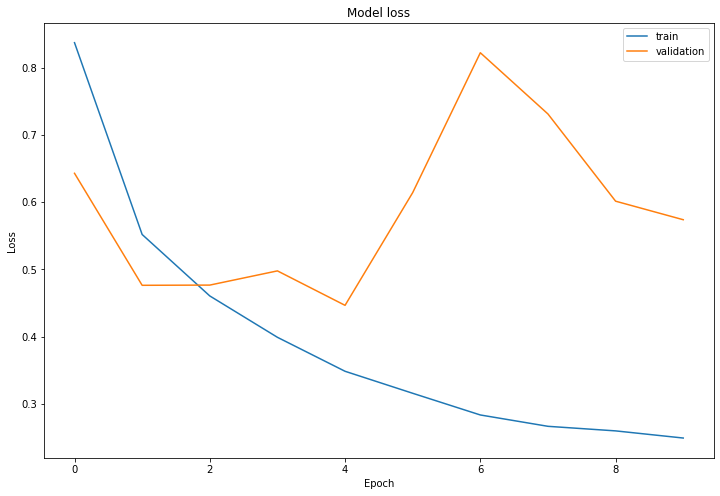

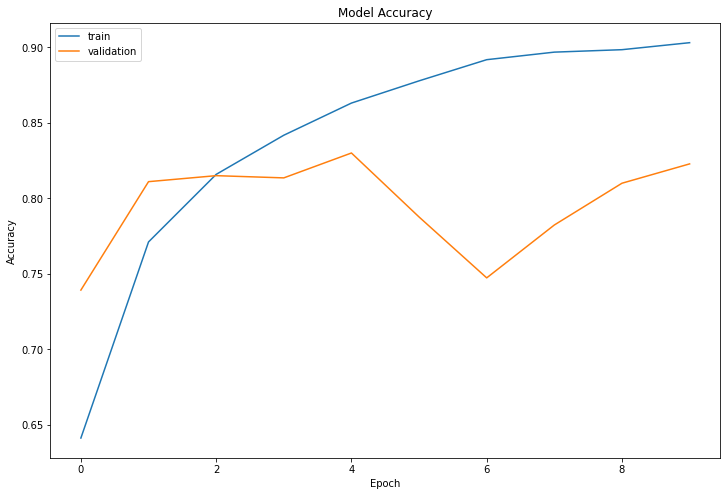

In [30]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [40]:
model1.predict(Xtest[0].reshape(1,200,200,1))

1/1 [==============================] - 0s 41ms/step


array([[5.1446568e-02, 3.0026213e-06, 3.1453216e-01, 6.3401824e-01]],
      dtype=float32)

In [36]:
Xtest[0].shape

(200, 200)

In [41]:
Ytest[0]

[0, 0, 1, 0]

In [44]:
def pred(model,testData):
    Ypred = []
    for i in tqdm(range(len(testData))):
        idx = np.argmax(model.predict(testData[i].reshape(1,200,200,1),verbose=0))
        y = [0,0,0,0]
        y[idx]+=1
        Ypred.append(y)
    
    
    return Ypred
    

In [56]:
Ypred = pred(model1,Xtest)

100%|██████████████████████████████████████████████████████████████████████████████| 6797/6797 [11:19<00:00, 10.00it/s]


In [57]:
sum(np.array([Ypred[i] == Ytest[i] for i in range(len(Ypred))]).astype(int))

5593

In [10]:
5593/6797 #accuracy

0.8228630278063852

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
cm = confusion_matrix(np.argmax(Ytest,axis=1), np.argmax(Ypred,axis=1))

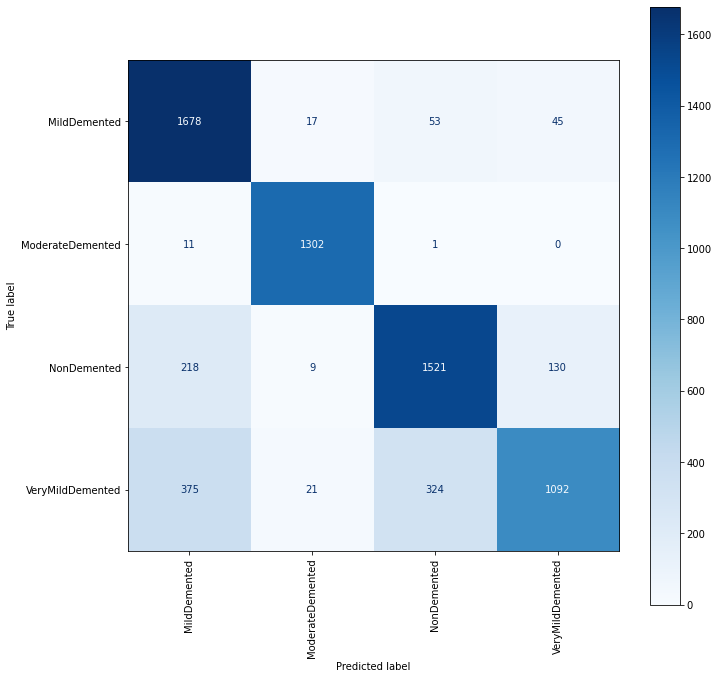

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])
plt.figure(figsize=(11,11))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xticks(rotation=90)
plt.show()

In [75]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(Ytest, Ypred, target_names=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])
print("Classification Report:\n", report)


Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.74      0.94      0.82      1793
ModerateDemented       0.97      0.99      0.98      1314
     NonDemented       0.80      0.81      0.81      1878
VeryMildDemented       0.86      0.60      0.71      1812

       micro avg       0.82      0.82      0.82      6797
       macro avg       0.84      0.83      0.83      6797
    weighted avg       0.83      0.82      0.82      6797
     samples avg       0.82      0.82      0.82      6797



In [78]:
model1.save('alze1CONV.keras')

#### By :  Sudhish Gupta